In [1]:
# ! pip install tabpfn #pip install "tabpfn @ git+https://github.com/PriorLabs/TabPFN.git"

# Setting Up Data Science Environment for Regression


This code imports essential tools for working with public datasets and evaluating regression models:

### Data Acquisition
- `fetch_openml`: Fetches datasets from the OpenML repository, which hosts thousands of public datasets
  - Unlike fixed scikit-learn datasets, this allows access to a wide variety of real-world data
  - Datasets can be specified by name or ID number
  - Example: `fetch_openml(name='boston', version=1)` or `fetch_openml(data_id=42)`

### Model Evaluation
- `mean_squared_error`: Calculates the average squared difference between predicted and actual values
  - Lower values indicate better model performance
  - Formula: MSE = (1/n) * Σ(y_true - y_pred)²
  - Units are squared units of the target variable

- `r2_score`: Coefficient of determination (R²)
  - Measures the proportion of variance in the dependent variable predictable from the independent variables
  - Range: 0 to 1, where 1 indicates perfect prediction
  - Can be negative if the model is worse than a horizontal line

### Data Splitting
- `train_test_split`: Divides datasets into random training and testing subsets
  - Essential for proper model validation
  - Typical usage: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`
  - Parameters control split ratio, stratification, and randomization

These tools are commonly used together in a regression workflow to fetch datasets, split the data appropriately, and evaluate model performance using standard metrics.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the Boston Housing dataset

In [3]:
data_dict = fetch_openml(data_id=531, as_frame=True)  # Boston Housing dataset

# Get the feature names

In [4]:
feature_names=list(data_dict.data.keys())

# Create a DataFrame for easier exploration

In [5]:
data_dict = fetch_openml(data_id=531, as_frame=True) 

X = data_dict.data
y = data_dict.target.astype(float)  # Ensure target is float for regression
df = pd.DataFrame(X, columns=feature_names)
df['MEDV'] = y


# Basic dataset information

In [6]:
print("Dataset Shape:", df.shape)
print("\nFeature Names:")
for i, name in enumerate(feature_names):
    print(f"{i+1}. {name}")

print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (506, 14)

Feature Names:
1. CRIM
2. ZN
3. INDUS
4. CHAS
5. NOX
6. RM
7. AGE
8. DIS
9. RAD
10. TAX
11. PTRATIO
12. B
13. LSTAT

First 5 rows:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


# Statistical summary

In [7]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe().T)


Statistical Summary:
         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21

# Check for missing values

In [8]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")



Missing Values:
No missing values


# Target variable distribution

/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


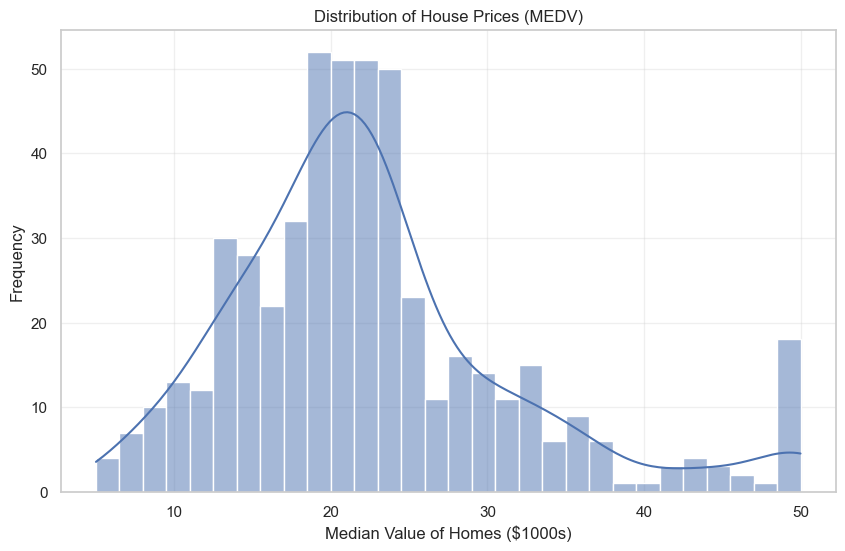

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True, bins=30)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Median Value of Homes ($1000s)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Print target statistics

In [10]:
print("\nTarget (MEDV) Statistics:")
print(df['MEDV'].describe())


Target (MEDV) Statistics:
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


# Correlations with target

In [11]:
correlations = df.corr()['MEDV'].sort_values(ascending=False)
print("\nCorrelations with Target (MEDV):")
print(correlations)


Correlations with Target (MEDV):
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


# Visualize correlations

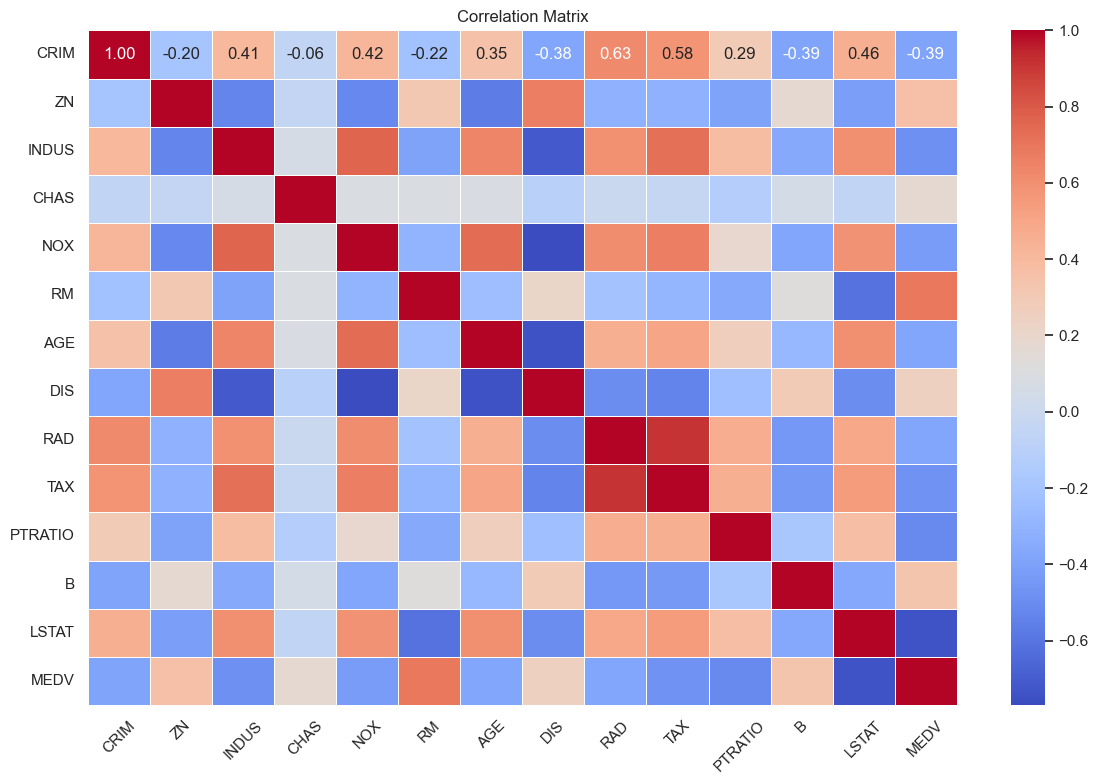

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top correlated features with target

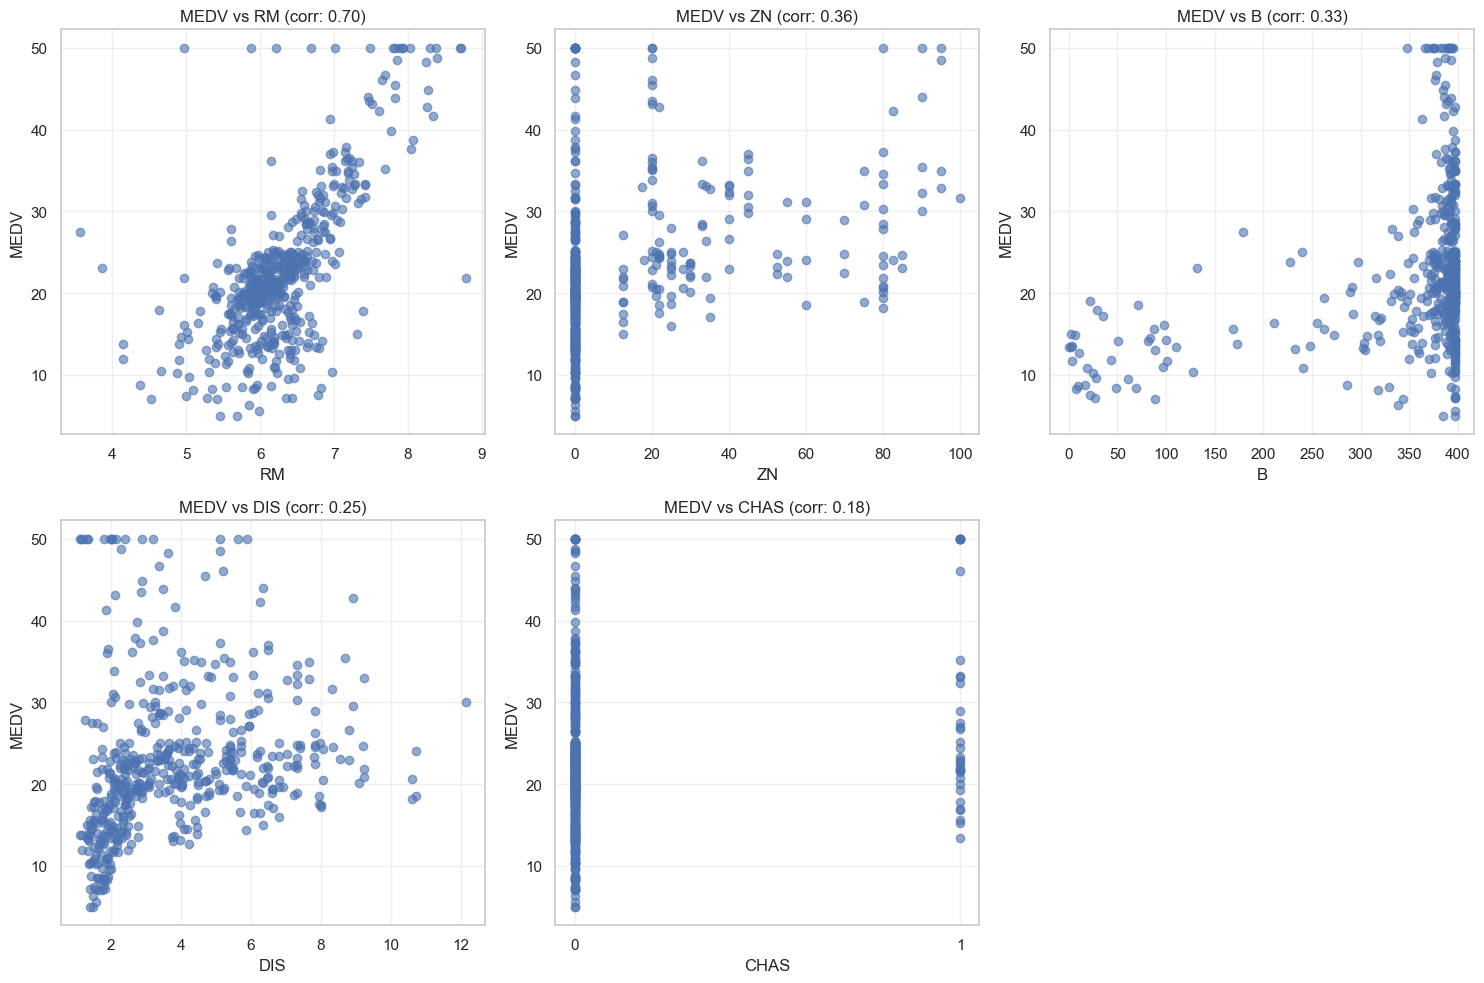

In [13]:
top_corr_features = correlations.index[1:6]  # Excluding MEDV itself which has correlation 1.0
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_corr_features):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[feature], df['MEDV'], alpha=0.6)
    plt.title(f'MEDV vs {feature} (corr: {correlations[feature]:.2f})')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Pairplot of important features

/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raamraam/outskill/GenAIEngineering-Coho

<Figure size 1200x1000 with 0 Axes>

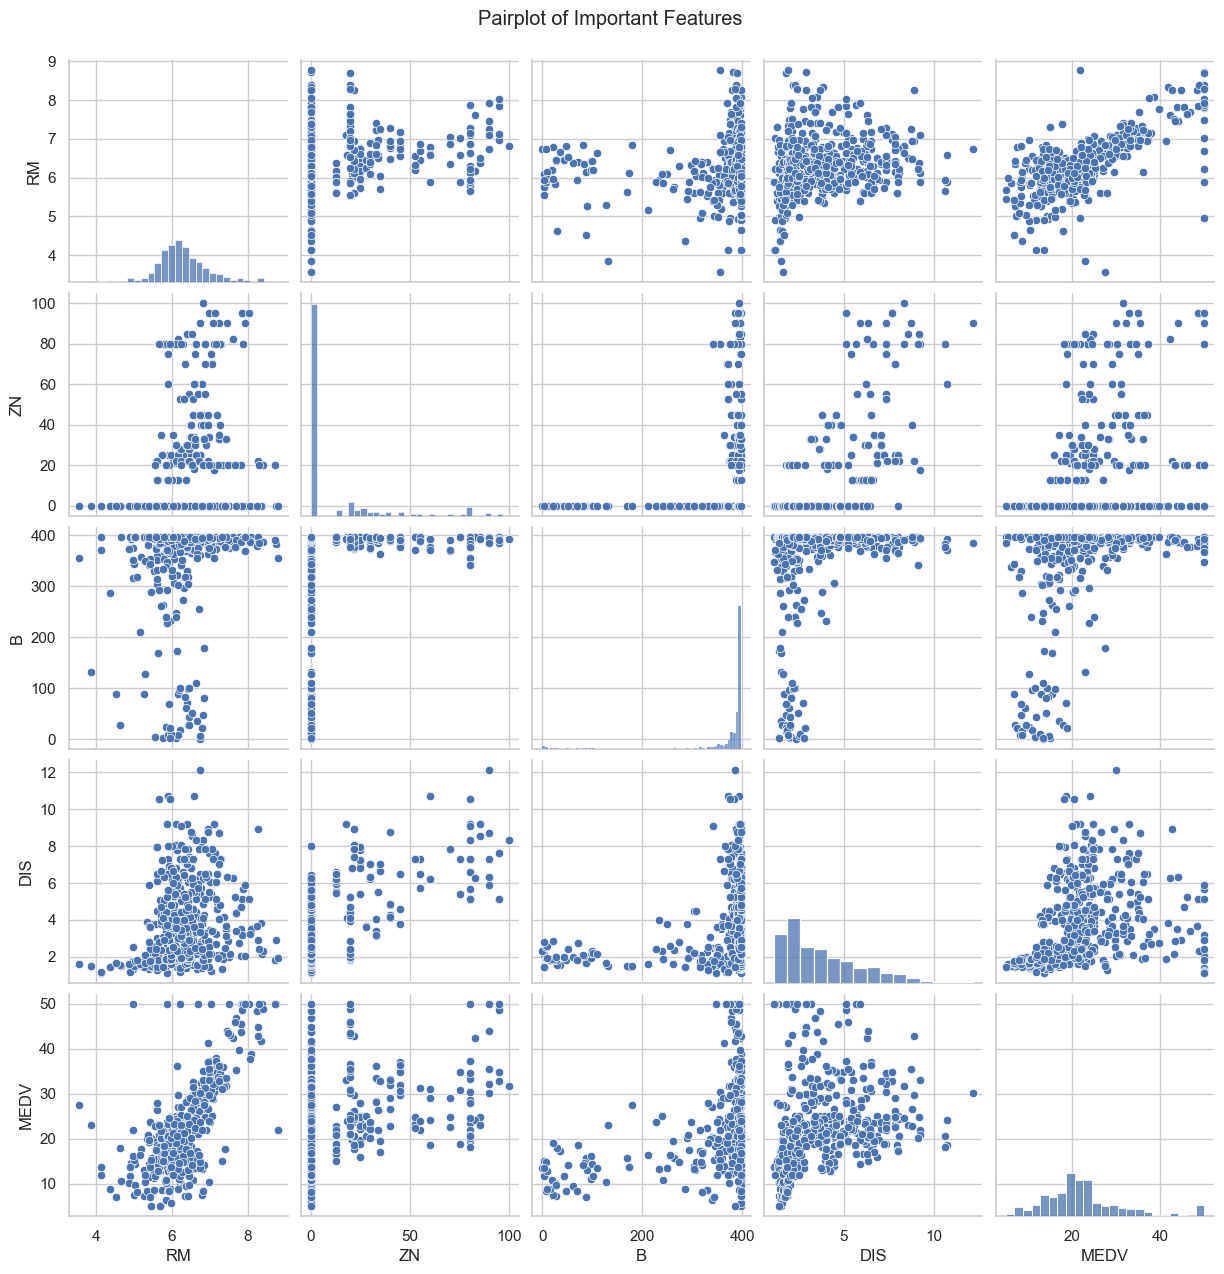

In [14]:
important_features = list(top_corr_features) + ['MEDV']
plt.figure(figsize=(12, 10))
sns.pairplot(df[important_features], height=2.5)
plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()

# Check for Skewness


Skewness of Features:
CRIM       5.223149
ZN         2.225666
MEDV       1.108098
DIS        1.011781
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64


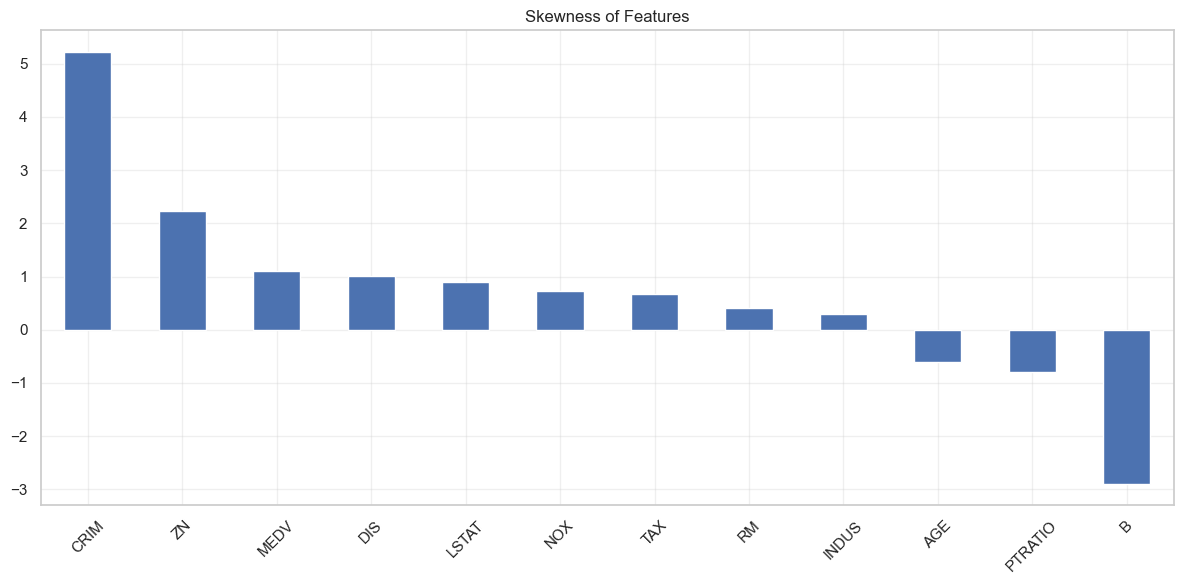

In [15]:
# 9. Check for Skewness
df_numeric = df.select_dtypes(include=['number'])
skewness = df_numeric.skew().sort_values(ascending=False)
print("\nSkewness of Features:")
print(skewness)

plt.figure(figsize=(12, 6))
skewness.plot(kind='bar')
plt.title('Skewness of Features')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Outlier detection

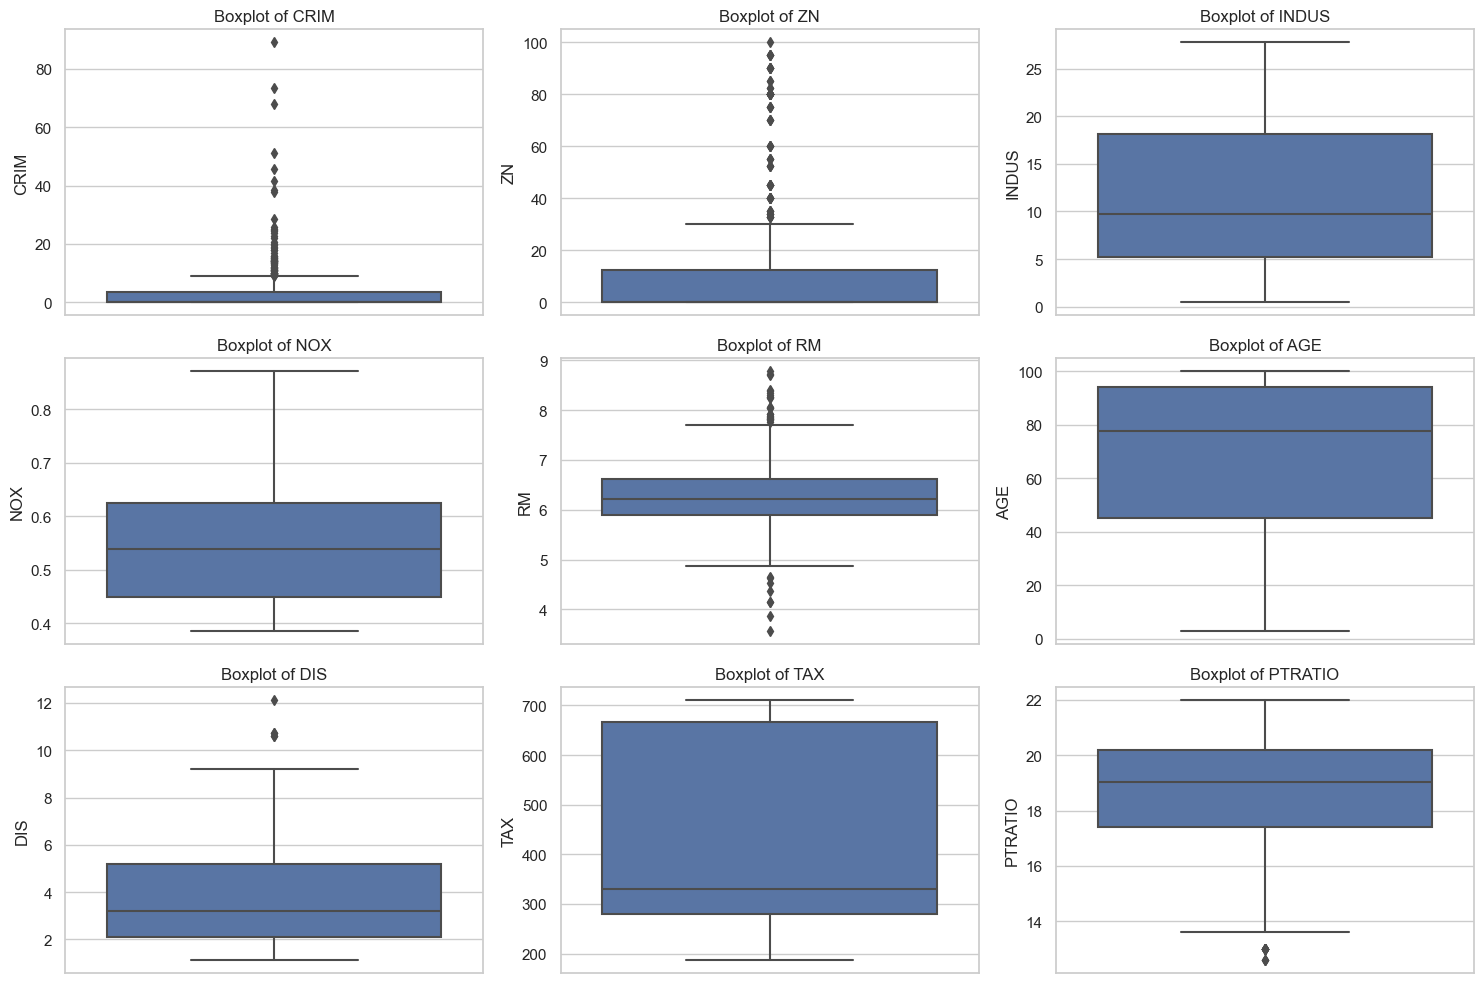

In [16]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df_numeric.columns):
    if i >= 9:  # Limit to 9 features for readability
        break
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Distribution of important feature variables

/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raamraam/outskill/GenAIEngineering-Coho

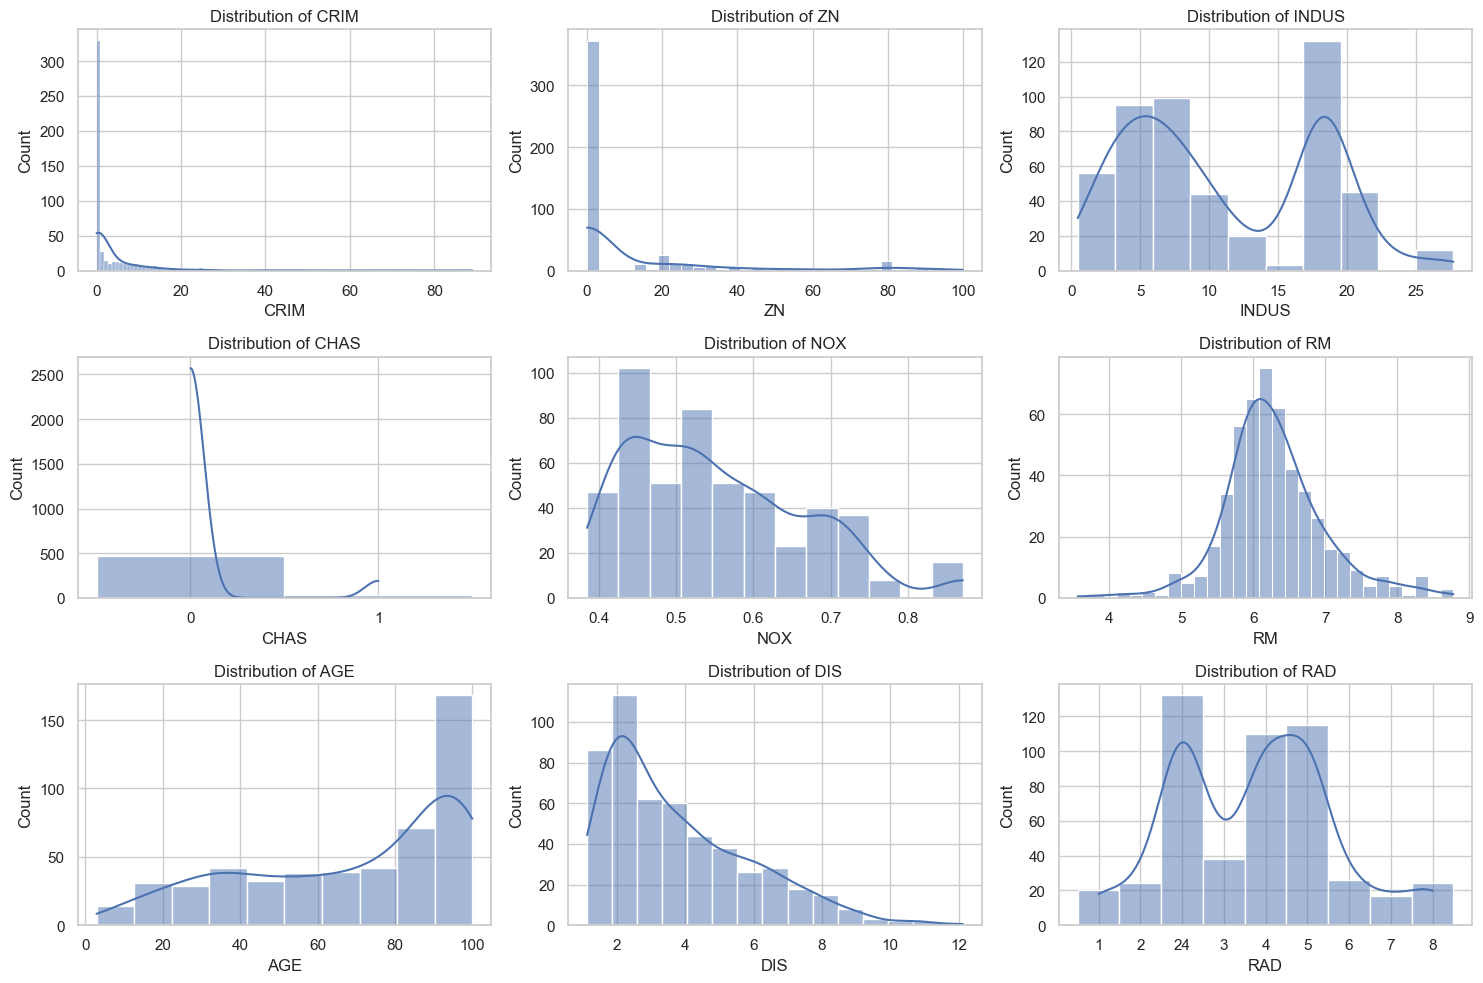

In [17]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    if i >= 9:  # Limit to 9 features for readability
        break
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# Using TabPFN for Regression on Boston Housing Data

This code sets up a regression task using TabPFN on the Boston Housing dataset:

### TabPFN for Regression
- `TabPFNRegressor`: A specialized regression variant of TabPFN (Tabular Prior-Data Fitted Network)
  - Unlike the classifier version, this is designed for predicting continuous values
  - Leverages the same transformer-based architecture with pre-training on synthetic tabular data
  - Typically requires minimal hyperparameter tuning for good performance

### Data Loading
- `fetch_openml(data_id=531, as_frame=True)`: Retrieves the Boston Housing dataset from OpenML
  - `data_id=531`: Specifies the Boston Housing dataset by its unique identifier
  - `as_frame=True`: Returns the data as a pandas DataFrame instead of a numpy array
  - This dataset contains information about housing in Boston suburbs and is a classic benchmark for regression

### Data Preparation
- `X = df.data`: Extracts the feature matrix
  - Contains attributes like CRIM (crime rate), ZN (proportion of residential land), INDUS (proportion of non-retail business acres), etc.
- `y = df.target.astype(float)`: Extracts the target variable and ensures it's in float format
  - The target is MEDV (Median value of owner-occupied homes in $1000s)
  - Converting to float is important for regression tasks to ensure proper calculations

This setup prepares for applying TabPFN's regression capabilities to predict housing prices based on neighborhood characteristics.

In [18]:
from tabpfn import TabPFNRegressor  

# Load Boston Housing data
df = fetch_openml(data_id=531, as_frame=True)  # Boston Housing dataset
X = df.data
y = df.target.astype(float)  # Ensure target is float for regression

# Splitting Data for Regression Analysis


### Function Parameters
- `X`: Feature matrix containing housing attributes (like crime rate, number of rooms, etc.)
- `y`: Target vector containing housing prices (MEDV)
- `test_size=0.5`: Allocates 50% of the data for testing and 50% for training
  - This is a larger test set than typical (usually 20-30%)
  - A 50/50 split provides ample data for both training and thorough evaluation
- `random_state=42`: Sets a specific random seed for reproducibility
  - Ensures the same split will occur each time the code runs
  - The value 42 is commonly used (a reference to "The Hitchhiker's Guide to the Galaxy")

### Resulting Datasets
- `X_train`: Features for training the model (approximately 253 samples)
- `X_test`: Features for evaluating the model (approximately 253 samples)
- `y_train`: Housing prices for the training set
- `y_test`: Housing prices for the test set

### Purpose
This data split allows you to:
1. Train the TabPFN regressor on one subset of the data
2. Test its performance on unseen data to evaluate generalization
3. Get a realistic estimate of how the model would perform on new housing data

The equal split between training and testing provides a balanced assessment of the model's predictive capabilities for this regression task.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Training the TabPFN Regressor

This code initializes and trains a TabPFN regressor on the Boston Housing dataset:

### Model Initialization
- `TabPFNRegressor()`: Creates an instance of TabPFN's regression model with default parameters
  - Unlike traditional regression models, TabPFN comes pre-trained on synthetic tabular data
  - The default configuration typically works well without extensive hyperparameter tuning
  - Optional parameters include N_ensemble_configurations (number of models in ensemble) and device (CPU/GPU)

### Model Training
- `regressor.fit(X_train, y_train)`: Adapts the regressor to the housing price prediction task
  - `X_train`: Feature matrix containing ~253 samples with housing attributes
  - `y_train`: Target vector containing corresponding housing prices (MEDV values)
  - The training process is typically faster than traditional models as it leverages transfer learning
  - TabPFN adapts its pre-trained knowledge to the specific patterns in the Boston Housing dataset

### What Happens During Fitting
During the `fit()` operation, TabPFN:
1. Normalizes the input features internally
2. Adapts its pre-trained transformer architecture to the regression task
3. Optimizes for continuous value prediction rather than classification
4. May create an ensemble of models if configured to do so

TabPFN's approach is especially advantageous for tabular regression tasks like housing price prediction, often achieving competitive performance with minimal configuration and training time.

In [20]:
# Initialize the regressor
regressor = TabPFNRegressor()  
regressor.fit(X_train, y_train)

/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/regressor.py:460: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


,n_estimators,8
,categorical_features_indices,None
,softmax_temperature,0.9
,average_before_softmax,False
,model_path,'auto'
,device,'auto'
,ignore_pretraining_limits,False
,inference_precision,'auto'
,fit_mode,'fit_preprocessors'
,memory_saving_mode,'auto'
,random_state,0


# Making Predictions with TabPFN Regressor


This code generates housing price predictions using the trained TabPFN regressor:

### Prediction Process
- `regressor.predict(X_test)`: Applies the trained model to make predictions on unseen test data
  - Takes the feature matrix `X_test` as input
  - Returns an array of predicted housing prices (MEDV values in $1000s)
  - No probability values are returned since this is a regression task (unlike classification)

### Behind the Scenes
When you call `predict()`, TabPFN:
1. Processes the input features through its transformer-based architecture
2. Converts the network outputs to continuous values appropriate for the regression task
3. Returns point estimates for each sample in the test set

### Next Steps After Prediction
After generating these predictions, you would typically:
- Evaluate model performance using metrics like MSE, RMSE, or R²
- Compare the predictions against actual values (y_test)
- Visualize the predictions vs. actual values to identify patterns or areas for improvement

TabPFN's unique approach often leads to competitive regression results with minimal configuration, making it an excellent choice for tabular regression tasks like housing price prediction.

In [21]:
# Predict on the test set
predictions = regressor.predict(X_test)

/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
print(predictions)

[24.829641  31.88968   15.275593  23.476364  17.302414  21.80158
 18.86287   14.699924  19.679363  21.004627  20.37487   18.046263
 10.5235195 22.289043  18.03105   24.725826  19.160912  10.316656
 46.85507   15.4577675 25.480354  27.56522   14.232136  22.366348
 15.512056  16.225887  21.69415   13.672206  18.927673  20.33205
 18.636276  24.105595  15.514196  21.513098  15.450206  16.27689
 31.71437   19.41008   22.035236  24.507967  18.627169  30.213377
 49.404316  18.668653  24.151554  15.105869  14.665146  25.693214
 19.529102  23.50747   18.673864  34.67919   17.255745  27.384686
 45.93715   22.107285  15.561022  31.57618   23.599377  17.001225
 24.472261  34.88736   32.107475  16.857445  23.27481   15.367708
 13.576742  23.719666  28.373241  14.231501  21.012615  24.33099
 10.295569  19.459604  23.43172    8.236156  20.342861  47.154827
 10.952816  11.342044  20.372137  10.860651  19.418865  10.40016
 19.944962  28.368755  16.159792  24.926277  26.013233  18.370697
 23.072697   8.

# Evaluating the TabPFN Regressor


This code assesses the performance of the TabPFN regressor using two standard regression metrics:

### Mean Squared Error (MSE)
- `mean_squared_error(y_test, predictions)`: Calculates the average squared difference between predicted and actual housing prices
  - Formula: MSE = (1/n) * Σ(y_true - y_pred)²
  - Lower values indicate better model performance
  - Units are squared dollars (in thousands), making it scale-dependent
  - Penalizes larger errors more heavily due to the squaring operation
  - Useful for comparing models on the same dataset

### R² Score (Coefficient of Determination)
- `r2_score(y_test, predictions)`: Measures the proportion of variance in housing prices that the model explains
  - Formula: R² = 1 - (Σ(y_true - y_pred)² / Σ(y_true - y_mean)²)
  - Scale-free metric ranging from -∞ to 1
  - R² = 1 indicates perfect prediction
  - R² = 0 indicates the model performs no better than simply predicting the mean value
  - R² < 0 indicates the model performs worse than predicting the mean
  - Generally, R² > 0.7 is considered good for real estate price prediction

### Interpretation
- These metrics together provide complementary insights:
  - MSE gives an absolute measure of prediction error in squared units
  - R² provides a relative measure of how well the model captures the variance in housing prices
  - A good model should have low MSE and high R² values

For the Boston Housing dataset, these metrics help assess how accurately TabPFN can predict home values based on neighborhood characteristics.

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 10.401479749648606
R² Score: 0.8717928529567319
